#### Import necessary libraries

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('HousingData.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [3]:
dataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
CRIM,486.000,3.612,8.720,0.006,0.082,0.254,3.560,88.976
ZN,486.000,11.212,23.389,0.000,0.000,0.000,12.500,100.000
INDUS,486.000,11.084,6.836,0.460,5.190,9.690,18.100,27.740
CHAS,486.000,0.070,0.255,0.000,0.000,0.000,0.000,1.000
NOX,506.000,0.555,0.116,0.385,0.449,0.538,0.624,0.871
RM,506.000,6.285,0.703,3.561,5.885,6.208,6.623,8.780
AGE,486.000,68.519,28.000,2.900,45.175,76.800,93.975,100.000
DIS,506.000,3.795,2.106,1.130,2.100,3.207,5.188,12.127
RAD,506.000,9.549,8.707,1.000,4.000,5.000,24.000,24.000
TAX,506.000,408.237,168.537,187.000,279.000,330.000,666.000,711.000


In [5]:
# Заменил Nan значения на mean значения
dataFrame =dataFrame.fillna(dataFrame.mean())
dataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


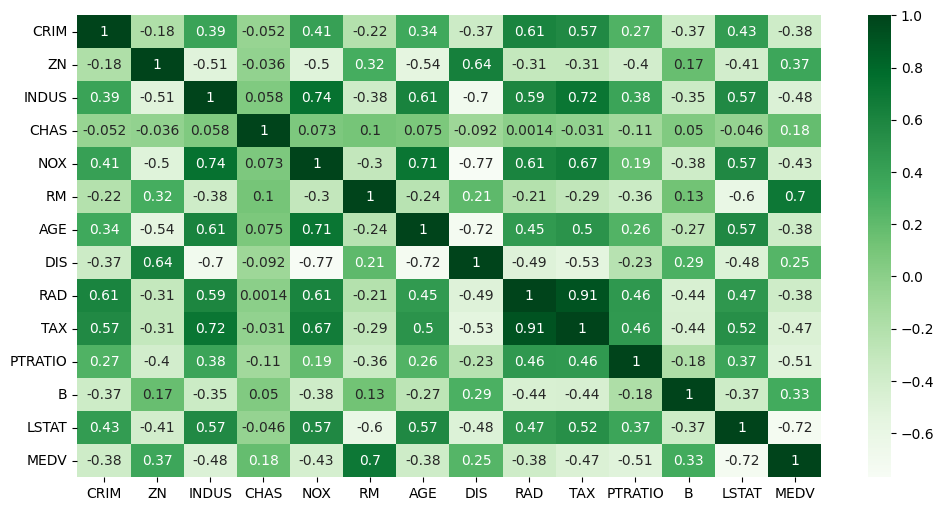

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataFrame.corr(), annot=True, cmap='Greens')
plt.show()

### Boston House Prices Dataset

Набор данных по ценам на дома в Бостоне широко используется в машинном обучении для прогнозирования медианной стоимости домов, занимаемых владельцами, в Бостоне. Вот перечень характеристик, представленных в наборе данных, вместе с их описанием:

1. **CRIM:** Уровень преступности на душу населения по городам
2. **ZN:** Доля жилой земли, зонированной под участки более 25 000 кв. футов
3. **INDUS:** Доля акров нерозничного бизнеса на город
4. **CHAS:** Фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
5. **NOX:** Концентрация оксидов азота (частей на 10 миллионов)
6. **RM:** Среднее количество комнат в жилище
7. **AGE:** Доля занятых владельцами единиц, построенных до 1940 года
8. **DIS:** Взвешенные расстояния до пяти бостонских центров занятости
9. **RAD:** Индекс доступности к радиальным магистралям
10. **TAX:** Полная ставка налога на недвижимость на 10 000 долларов
11. **PTRATIO:** Соотношение учеников и учителей в городе
12. **B:** 1000(Bk - 0.63)^2, где Bk - доля чернокожего населения по городу
13. **LSTAT:** Процент населения с низким социальным статусом
14. **MEDV:** Медианная стоимость занимаемых владельцами домов в тысячах долларов


Из диаграммы можно заметить что наибольшая корреляция с target колонкой (MEDV) у **RM: 0.7** **LSTAT: -0.72** **PTRATIO: -0.51** **INDUS: -0.48** **TAX: -0.47**

Это объясняется тем что стоимость дома зависит в первую очередь от количества комнат от процент населения с низким социальным статусом и от дополнительных факторов как школы и учителя земля под бизнес и полной ставки налога на недвижимость

In [7]:
target_df = dataFrame[['RM','LSTAT', 'PTRATIO', 'INDUS', 'TAX']]
target = dataFrame['MEDV']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(target_df, target, test_size=0.2, random_state=3)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create a linear regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train_scaled, Y_train)

# Make predictions on the testing data
Y_pred = linear_reg_model.predict(X_test_scaled)

mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2_model_score = linear_reg_model.score(X_test_scaled, Y_test)
print(f"R-squared (score function): {r2_model_score}")

# Display the coefficients and intercept
coefficients = pd.Series(linear_reg_model.coef_, index=['RM','LSTAT', 'PTRATIO', 'INDUS', 'TAX'])
print("\nModel Coefficients:")
print(coefficients)
print("\nIntercept:", linear_reg_model.intercept_)

Mean Absolute Error: 3.3770998707099826
Mean Squared Error: 20.870805129927124
Root Mean Squared Error: 4.568457631403308
R-squared (score function): 0.7477994704438569

Model Coefficients:
RM         3.202436
LSTAT     -3.691411
PTRATIO   -1.843549
INDUS     -0.236736
TAX       -0.333990
dtype: float64

Intercept: 22.448762376237617


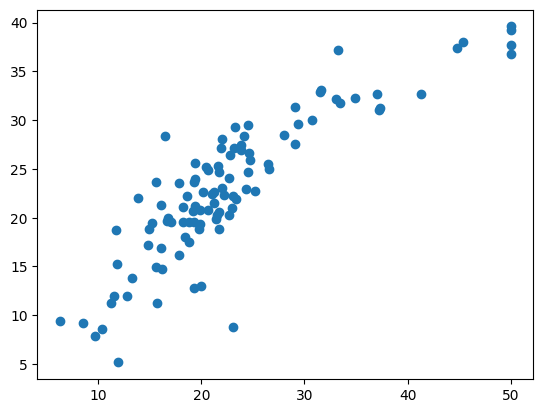

In [10]:
plt.scatter(Y_test,Y_pred)